# SPACESHIP-TITATIC ANALYSIS

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

from sklearn.pipeline import FunctionTransformer, Pipeline

from sklearn.preprocessing import OrdinalEncoder

import utilities

In [5]:
# Load the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


## First visualization

In [6]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


- **PassengerId**: A unique ID for each passenger. Each ID takes the form `gggg_pp` where `gggg` indicates a group the passenger is traveling with and `pp` is their number within the group. People in a group are often family members, but not always.
- **HomePlanet**: The planet the passenger departed from, typically their planet of permanent residence.
- **CryoSleep**: Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- **Cabin**: The cabin number where the passenger is staying. Takes the form `deck/num/side`, where `side` can be either `P` for Port or `S` for Starboard.
- **Destination**: The planet the passenger will be debarking to.
- **Age**: The age of the passenger.
- **VIP**: Whether the passenger has paid for special VIP service during the voyage.
- **RoomService**, **FoodCourt**, **ShoppingMall**, **Spa**, **VRDeck**: Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- **Name**: The first and last names of the passenger.
- **Transported**: Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


In [7]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
# Get all columns type
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

{'graphcolor': 'blueviolet', 'rotation': 10, 'horizontal': False, 'startangle': 0, 'size_circle_pie': 0.75, 'linewidth': 0, 'title': 'Missing Data', 'title_before': '', 'title_after': '', 'title_fontsize': 14, 'title_bold': True, 'title_italic': False, 'x_label_title': 'Feature', 'y_label_title': 'Frequency', 'x_label_fontsize': 11, 'y_label_fontsize': 11, 'x_label_bold': True, 'y_label_bold': True, 'x_label_italic': False, 'y_label_italic': False, 'x_ticks_shorten': None, 'y_ticks_shorten': None, 'xticks_sep': 'auto', 'yticks_sep': 'auto', 'axgridx': False, 'axgridy': True, 'linestylex': '--', 'linestyley': '--', 'set_edgecolor': True, 'customize_plot_colors': True, 'edgefactor': 0.6, 'color_label': 'auto', 'color_spine': 'auto', 'color_tick': 'auto', 'color_grid': 'auto', 'color_annot': 'matching', 'color_multibar': ('deepskyblue', 'blueviolet'), 'add_value_annot': True, 'annot_percentage': 8, 'annot_fontsize': 8, 'annot_outside': False, 'annot_bold': True, 'annot_italic': False, 'an

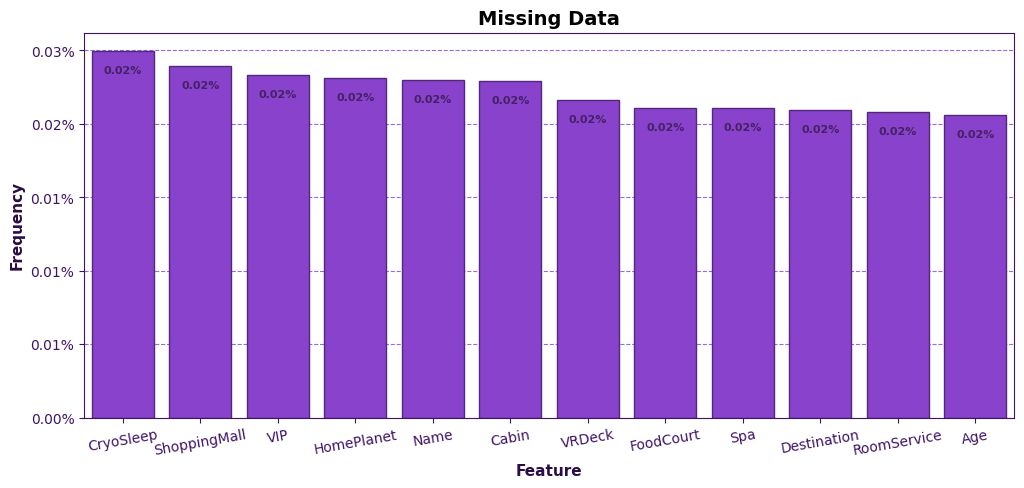

In [24]:
plt.figure(figsize=(12, 5))
ax = plt.subplot(111)
_ = utilities.plot_missing_data(ax, train, frequency=True, 
                                color='blueviolet', linewidth=0, 
                                graphcolor='blueviolet', rotation=10)

In [16]:
# Get unique values in each column
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [27]:
# Get unique values for HomePlanet and Destination
unique_homeplanet, unique_destination = train['HomePlanet'].unique(), train['Destination'].unique()
print(unique_homeplanet, unique_destination)

['Europa' 'Earth' 'Mars' nan] ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]


## Relation between 'Transported' and other raw columns

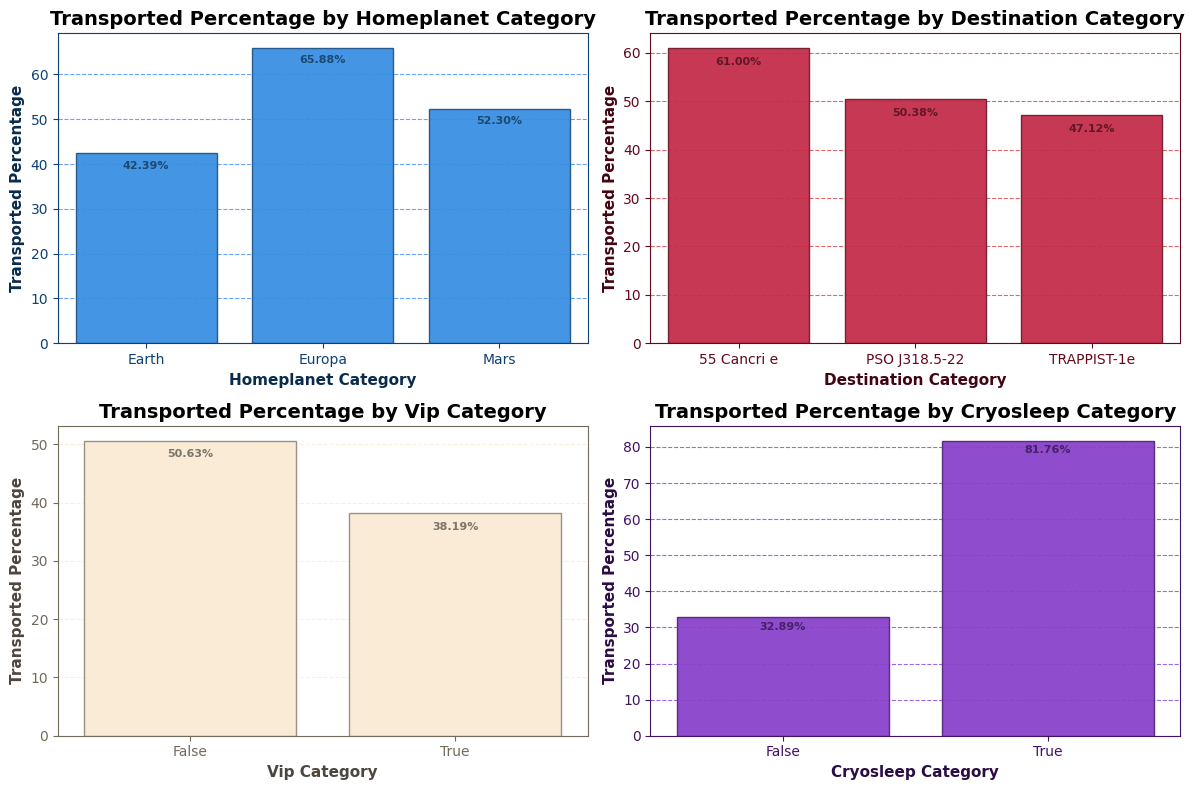

In [31]:
plt.figure(figsize=(12, 8))
for i, (col, color) in enumerate(zip(['HomePlanet', 'Destination', 'VIP', 'CryoSleep'], ['dodgerblue', 'crimson', 'blanchedalmond', 'blueviolet'])):
    ax = plt.subplot(2, 2, i+1)
    utilities.plot_groupby(ax, train, col, 'Transported', color=color, 
                           rotation=0, axgridy=True, graphcolor=color, 
                           frequency=True, alpha=0.95)
plt.tight_layout()

## Data Engineering

In [32]:
train_copy = train.copy()

In [33]:
def convert_column(df):
    df['VIP'] = df['VIP'].astype(bool)
    df['HomePlanet'] = df['HomePlanet'].astype(str)
    df['Destination'] = df['Destination'].astype(str)
    df['CryoSleep'] = df['CryoSleep'].astype(bool)
    return df

def replace_missing_values(df):
    df['Name'] = df['Name'].fillna('Unknown Unknown')
    df['Cabin'] = df['Cabin'].fillna('U/-1/U')
    df['VRDeck'] = df['VRDeck'].fillna(0)
    df['FoodCourt'] = df['FoodCourt'].fillna(0)
    df['ShoppingMall'] = df['ShoppingMall'].fillna(0)
    df['Spa'] = df['Spa'].fillna(0)
    df['RoomService'] = df['RoomService'].fillna(0)
    df['VIP'] = df['VIP'].fillna(df['VIP'].mode()[0])
    df['HomePlanet'] = df['HomePlanet'].fillna(df['HomePlanet'].mode()[0])
    df['Destination'] = df['Destination'].fillna(df['Destination'].mode()[0])
    df['CryoSleep'] = df['CryoSleep'].fillna(df['CryoSleep'].mode()[0])
    return df

def boolean_column_unknown_name(df):
    df['UnknownName'] = df['Name'].apply(lambda x: 1 if x == 'Unknown Unknown' else 0)
    return df

def family_size_column(df):
    family_names = Counter(name.split(' ')[1] for name in df['Name'])
    df['FamilySize'] = df['Name'].apply(lambda x: family_names[x.split(' ')[1]] if x != 'Unknown Unknown' else 1)
    return df

def deck_num_side_column(df):
    df['Deck'] = df['Cabin'].apply(lambda x: x.split('/')[0] if pd.notnull(x) else 'U')
    df['Side'] = df['Cabin'].apply(lambda x: x.split('/')[2] if pd.notnull(x) else 'U')

    df['Deck'] = df['Deck'].astype(str)
    df['Side'] = df['Side'].astype(str)
    return df

def bin_age(df):
    df['Age'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 100], labels=['Child', 'Young', 'Adult', 'Old'])
    df['Age'] = df['Age'].cat.add_categories('Unknown').fillna('Unknown')
    return df

def boolean_money(df):
    df['VRDeck'] = df['VRDeck'].apply(lambda x: True if x > 0 else False)
    df['FoodCourt'] = df['FoodCourt'].apply(lambda x: True if x > 0 else False)
    df['Spa'] = df['Spa'].apply(lambda x: True if x > 0 else False)
    df['RoomService'] = df['RoomService'].apply(lambda x: True if x > 0 else False)
    df['ShoppingMall'] = df['ShoppingMall'].apply(lambda x: True if x > 0 else False)
    df['Money'] = df['VRDeck'] & df['FoodCourt'] & df['Spa'] & df['RoomService'] & df['ShoppingMall']
    return df

def drop_columns(df):
    return df.drop(['Name', 'Cabin'], axis=1)

def transform_data(df):
    df = pd.get_dummies(df, columns=['HomePlanet', 'Destination', 'Deck', 'Side'], drop_first=True)
    age_order = [['Child', 'Young', 'Adult', 'Old', 'Unknown']]
    encoder = OrdinalEncoder(categories=age_order)
    df['Age'] = encoder.fit_transform(df[['Age']])
    return df


In [34]:
convert_column_transformer         = FunctionTransformer(convert_column)
replace_missing_values_transformer = FunctionTransformer(replace_missing_values)
boolean_column_transformer         = FunctionTransformer(boolean_column_unknown_name)
family_size_column_transformer     = FunctionTransformer(family_size_column)
deck_num_side_column_transformer   = FunctionTransformer(deck_num_side_column)
bin_age_transformer                = FunctionTransformer(bin_age)
boolean_money_transformer          = FunctionTransformer(boolean_money)
drop_columns_transformer           = FunctionTransformer(drop_columns)
transform_data_transformer         = FunctionTransformer(transform_data)

# Create pipeline
pipeline = Pipeline([
    ('convert_column', convert_column_transformer),
    ('replace_missing_values', replace_missing_values_transformer),
    ('boolean_column_unknown_name', boolean_column_transformer),
    ('family_size_column', family_size_column_transformer),
    ('deck_num_side_column', deck_num_side_column_transformer),
    ('bin_age', bin_age_transformer),
    ('boolean_money', boolean_money_transformer),
    ('drop_columns', drop_columns_transformer),
    ('transform_data', transform_data_transformer)
])

In [35]:
train_copy = pipeline.fit_transform(train_copy)
train_copy.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Side_S,Side_U
0,0001_01,False,2.0,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,0002_01,False,1.0,False,True,True,True,True,True,True,...,False,False,False,False,True,False,False,False,True,False
2,0003_01,False,3.0,True,True,True,False,True,True,False,...,False,False,False,False,False,False,False,False,True,False
3,0003_02,False,2.0,False,False,True,True,True,True,False,...,False,False,False,False,False,False,False,False,True,False
4,0004_01,False,0.0,False,True,True,True,True,True,True,...,False,False,False,False,True,False,False,False,True,False


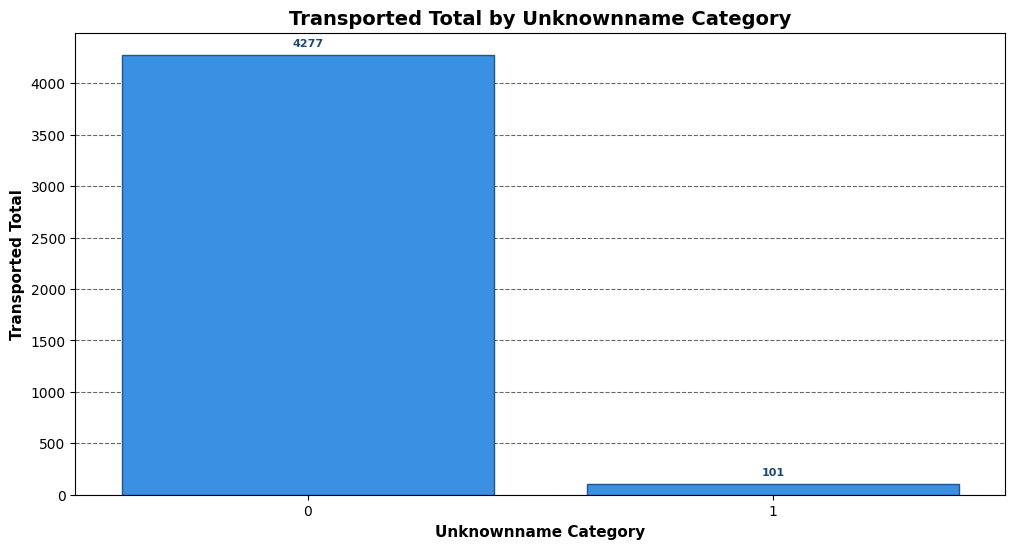

In [44]:
plt.figure(figsize=(12, 6))
ax = plt.subplot(111)
_ = utilities.plot_groupby(ax, train_copy, 'UnknownName', 'Transported', 
                           color='dodgerblue', rotation=0, axgridy=True, 
                           annot_percentage=2, annot_outside=True)

No influence of abscence of name in transportation!

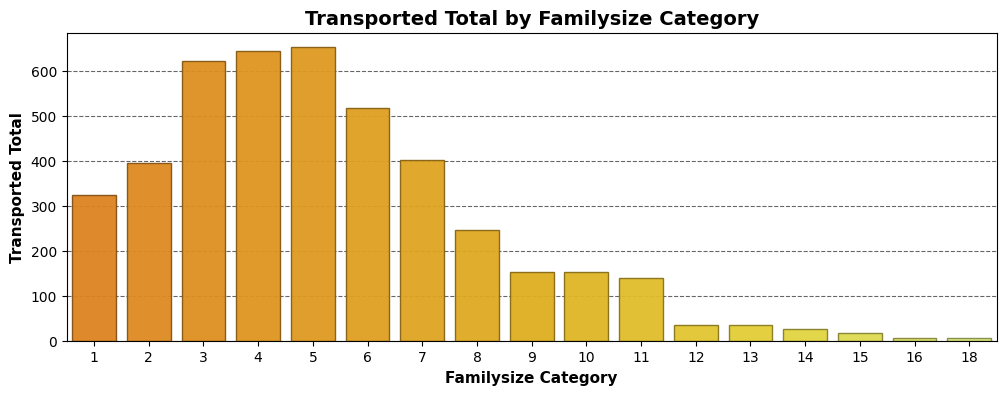

In [48]:
plt.figure(figsize=(12, 4))
ax = plt.subplot(111)
_ = utilities.plot_groupby(ax, train_copy, 'FamilySize', 'Transported', color='Wistia_r', 
                           rotation=0, axgridy=True, linewidth=0, alpha=0.95, add_value_annot=False)

Small to no influence of size of family!

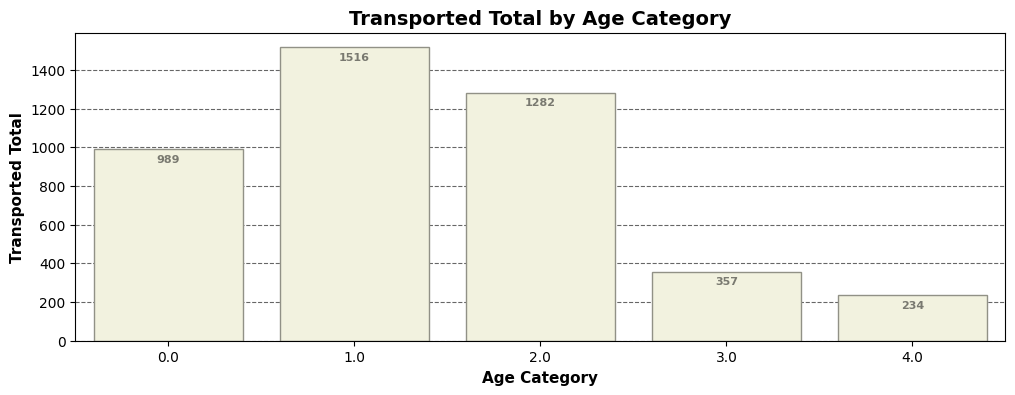

In [51]:
plt.figure(figsize=(12, 4))
ax = plt.subplot(111)
_ = utilities.plot_groupby(ax, train_copy, 'Age', 'Transported', color='beige', 
                           rotation=0, axgridy=True, linewidth=0.2, annot_percentage=10)

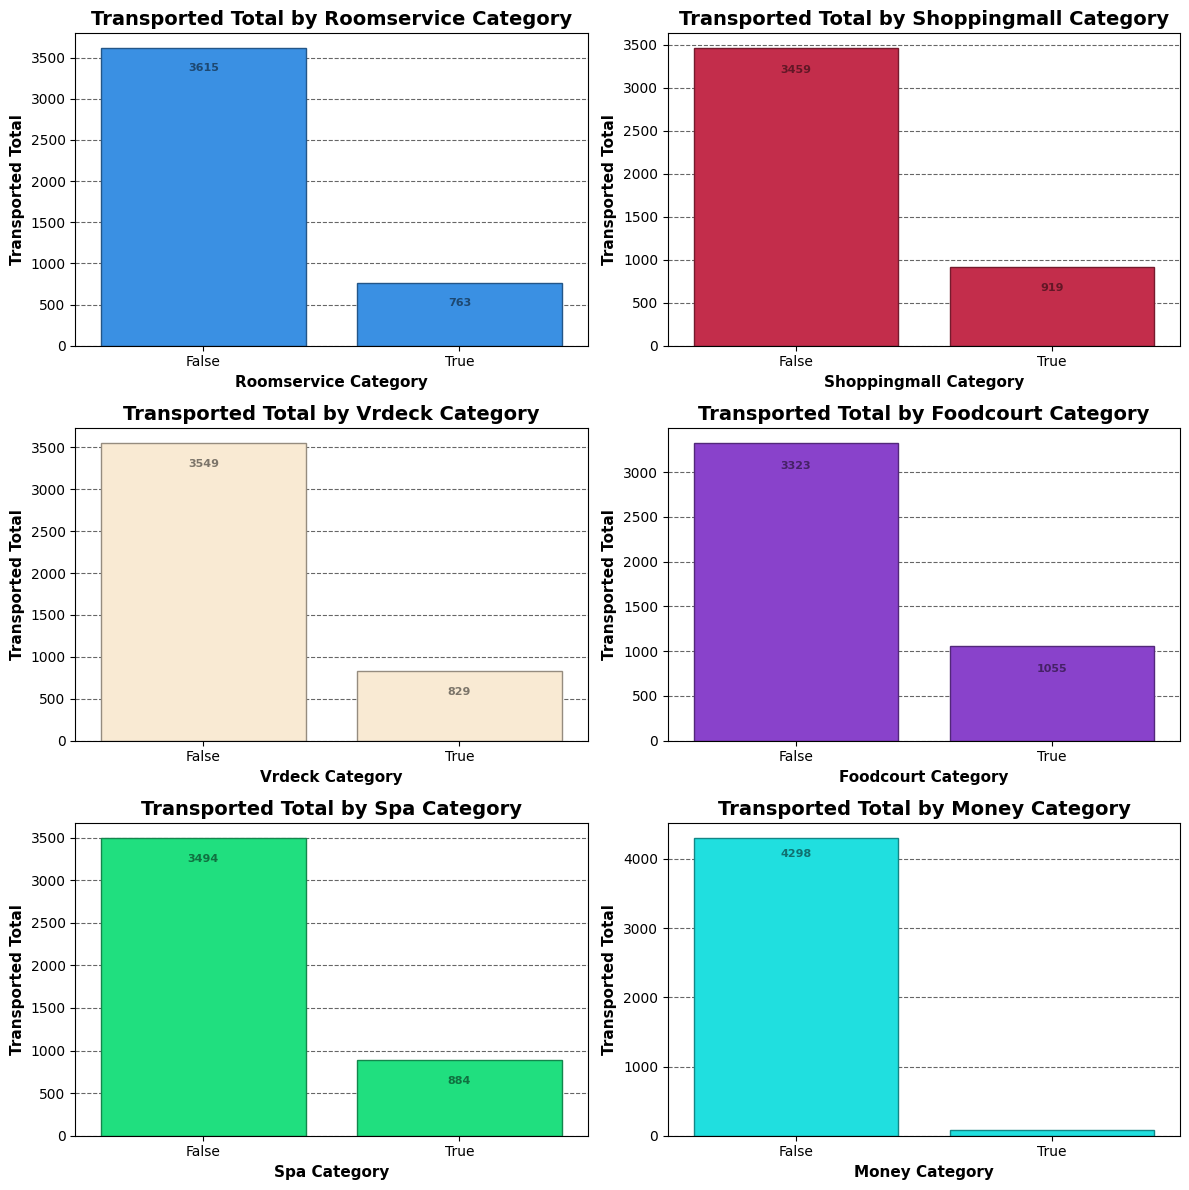

In [54]:
plt.figure(figsize=(12, 12))
for i, (col, color) in enumerate(zip(['RoomService', 'ShoppingMall', 'VRDeck', 'FoodCourt', 'Spa', 'Money'], 
                                          ['dodgerblue', 'crimson', 'blanchedalmond', 'blueviolet', 'springgreen', 'cyan'])):
    ax = plt.subplot(3, 2, i+1)
    utilities.plot_groupby(ax, train_copy, col, 'Transported', 
                           color=color, rotation=0, axgridy=True, annot_percentage=15)
plt.tight_layout()

In [ ]:
train_copy.dtypes

PassengerId                   object
CryoSleep                       bool
Age                          float64
VIP                             bool
RoomService                     bool
FoodCourt                       bool
ShoppingMall                    bool
Spa                             bool
VRDeck                          bool
Transported                     bool
UnknownName                    int64
FamilySize                     int64
Money                           bool
HomePlanet_Europa               bool
HomePlanet_Mars                 bool
HomePlanet_nan                  bool
Destination_PSO J318.5-22       bool
Destination_TRAPPIST-1e         bool
Destination_nan                 bool
Deck_B                          bool
Deck_C                          bool
Deck_D                          bool
Deck_E                          bool
Deck_F                          bool
Deck_G                          bool
Deck_T                          bool
Deck_U                          bool
S

In [ ]:
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

X = train_copy.drop(['PassengerId', 'Transported'], axis=1)
y = train_copy['Transported']

# XGBoost Classifier
xgb = XGBClassifier()
xgb_param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.1, 0.01, 0.001],
}

xgb_grid_search = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid_search.fit(X, y)
print("Best parameters for XGBoost Classifier:", xgb_grid_search.best_params_)

# Random Forest Classifier
rfc = RandomForestClassifier()
rfc_param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 7],
}

rfc_grid_search = GridSearchCV(estimator=rfc, param_grid=rfc_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rfc_grid_search.fit(X, y)
print("Best parameters for Random Forest Classifier:", rfc_grid_search.best_params_)

# Support Vector Classifier
svc = SVC()
svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
}

svc_grid_search = GridSearchCV(estimator=svc, param_grid=svc_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svc_grid_search.fit(X, y)
print("Best parameters for Support Vector Classifier:", svc_grid_search.best_params_)

# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg_param_grid = {
    'C': [0.1, 1, 10],
}

log_reg_grid_search = GridSearchCV(estimator=log_reg, param_grid=log_reg_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
log_reg_grid_search.fit(X, y)
print("Best parameters for Logistic Regression Classifier:", log_reg_grid_search.best_params_)


# Get the best models
best_xgb_model = xgb_grid_search.best_estimator_
best_rfc_model = rfc_grid_search.best_estimator_
best_svc_model = svc_grid_search.best_estimator_
best_log_reg_model = log_reg_grid_search.best_estimator_

# Print score for each model
print("XGBoost Classifier Score:", xgb_grid_search.best_score_)
print("Random Forest Classifier Score:", rfc_grid_search.best_score_)
print("Support Vector Classifier Score:", svc_grid_search.best_score_)
print("Logistic Regression Classifier Score:", log_reg_grid_search.best_score_)

Best parameters for XGBoost Classifier: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}
Best parameters for Random Forest Classifier: {'max_depth': 7, 'n_estimators': 200}


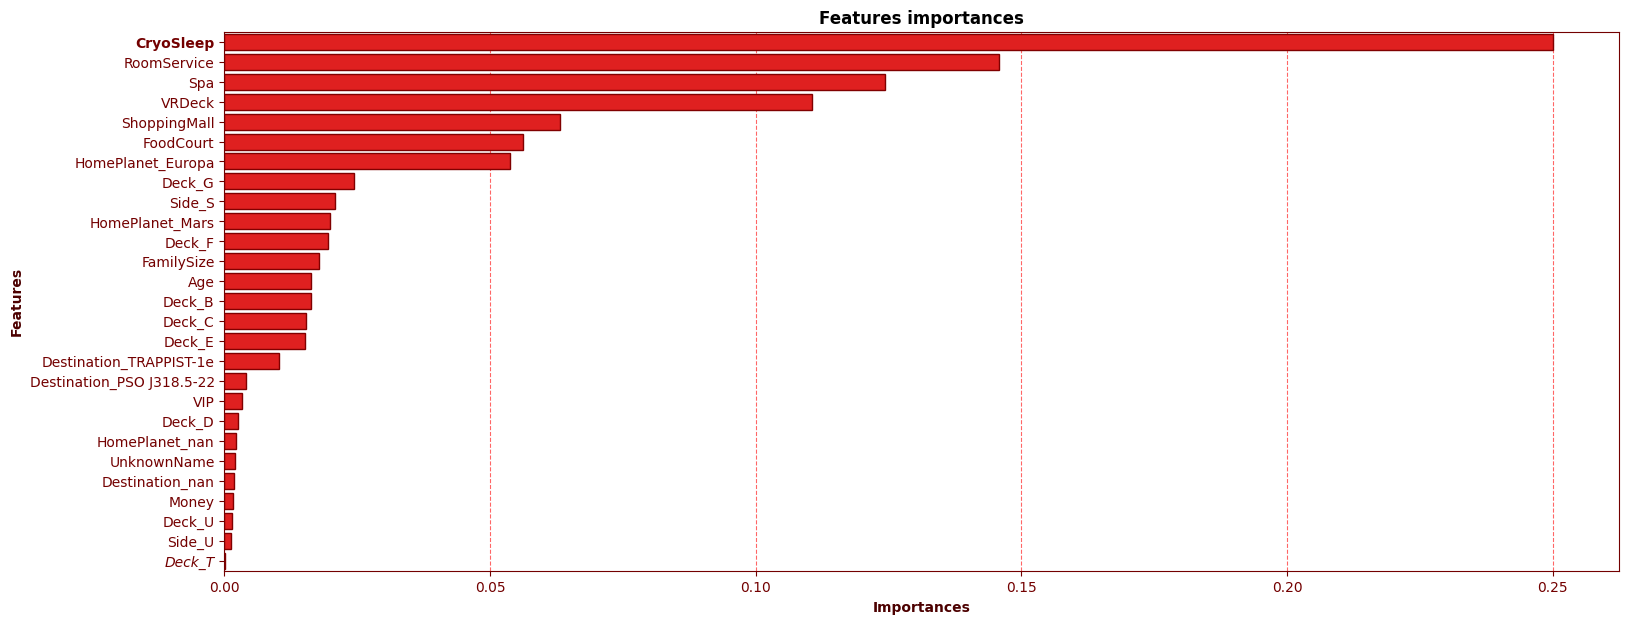

In [ ]:
# Plot feature importance
plt.figure(figsize=(18, 7))
ax = plt.subplot(111)
utilities.plot_feature_importance(ax, X.columns, best_rfc_model.feature_importances_, color='red', linewidth=0.1)
plt.show()

In [ ]:
best_estimator = best_rfc_model

best_estimator.fit(X, y)

RandomForestClassifier(max_depth=7, n_estimators=200)

In [ ]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
result = pipeline.fit_transform(test)
result.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,UnknownName,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Side_S,Side_U
0,0013_01,True,1.0,False,False,False,False,False,False,0,...,False,False,False,False,False,True,False,False,True,False
1,0018_01,False,1.0,False,False,True,False,True,False,0,...,False,False,False,False,True,False,False,False,True,False
2,0019_01,True,2.0,False,False,False,False,False,False,0,...,False,True,False,False,False,False,False,False,True,False
3,0021_01,False,2.0,False,False,True,False,True,True,0,...,False,True,False,False,False,False,False,False,True,False
4,0023_01,False,1.0,False,True,False,True,False,False,0,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
test_pred = pd.DataFrame({'PassengerId': result['PassengerId'], 'Transported': best_estimator.predict(result.drop('PassengerId', axis=1))})
test_pred['Transported'] = test_pred['Transported'].apply(lambda x: 'True' if x else 'False')
test_pred.to_csv('submission.csv', index=False)